#Taitanic (Kaggle)

## 1. Load packages

In [1]:
#한글 폰트 사용 : colab , 런타임 다시 시작 하기
%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum


fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [23]:
import numpy as np 
import pandas as pd 

import matplotlib
import matplotlib.pyplot as plt

#한글 폰트 사용 : vscode , window
import matplotlib as mpl
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

#마이너스 깨지는 경우 처리
matplotlib.rcParams['axes.unicode_minus'] = False 
import seaborn as sns
# 배경을 darkgrid 로 설정
sns.set(style='darkgrid')

##2.Dataset
+ taitanic 데이터가져오기
+ taitanic 데이터의 행과 열 구하기
+ taitanic 데이터의 상위 열 보기
+ taitanic 데이터의 통계정보 보기

#### 파이썬 기초

In [3]:
#파일 읽기
with open('/content/drive/My Drive/PythonWork/PythonBasic/work/10/taitanic.csv', 'r') as fp:
    data = fp.readlines()

print(type(data))

<class 'list'>


In [4]:
#리스트 항목 가져오기 : 첫줄 제거 
data = data[1:]
print(data[:3])

['1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S\n', '2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C\n', '3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S\n']


##### 항목이름
'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'

In [5]:
#0:사망, 1:생존
Survived = []
Sex = [] 
for line in data :
    item = line.replace('\n','')
    item = item.split(',')
    Survived.append(int(item[1])) #형변환해야함 
    Sex.append(item[-8]) #이름에 ,가 있어서 뒤쪽에서 항목을 찾음 

print(Survived)
print(Sex)


[0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 

In [6]:
#생존율 
rate = sum(Survived) / len(Survived) * 100
print(f'생존율 : {rate:0.2f} %')

생존율 : 38.38 %


In [7]:
#생존자와 사망자 수 
Survived0 = Survived.count(0)
Survived1 = Survived.count(1)

print(Survived0)
print(Survived1)

549
342


In [8]:
#성별인원수
sexdt = {'male':0, 'female':0}
sexdt['male'] = Sex.count('male')
sexdt['female'] = Sex.count('female')
print(sexdt)

{'male': 577, 'female': 314}


In [9]:
#성별 사망자와 생존자 리스트 생성 


In [10]:
len(Survived)

891

In [11]:
Sex[0]

'male'

In [12]:
Survived[0]

0

In [13]:
sexdt = {'male':[0,0], 'female':[0,0]}
for idx in range(len(Survived)) :
    if (Sex[idx] == 'male' and Survived[idx] == 0 ) : sexdt['male'][0] =  sexdt['male'][0] + 1 
    elif (Sex[idx] == 'male' and Survived[idx] == 1 ) : sexdt['male'][1] =  sexdt['male'][1] + 1 
    elif (Sex[idx] == 'female' and Survived[idx] == 0 ) : sexdt['female'][0] =  sexdt['female'][0] + 1 
    elif (Sex[idx] == 'female' and Survived[idx] == 1 ) : sexdt['female'][1] =  sexdt['female'][1] + 1 

sexdt

{'female': [81, 233], 'male': [468, 109]}

In [14]:
sexdt = {'male':(0,0), 'female':(0,0)}

sexdt['female'] = list(sexdt['female'])
sexdt['male'] = list(sexdt['male'])

for idx in range(len(Survived)) :
    sexdt[Sex[idx]][Survived[idx]] =  sexdt[Sex[idx]][Survived[idx]] + 1 

sexdt['female'] = tuple(sexdt['female'])
sexdt['male'] = tuple(sexdt['male'])
sexdt

{'female': (81, 233), 'male': (468, 109)}

In [15]:
#딕션너리 -> 데이터프레임으로 변경 
dt = pd.DataFrame(sexdt)
dt

,male,female
0,468,81
1,109,233


In [16]:
dt.index = ['사망자', '생존자']
dt

,male,female
사망자,468,81
생존자,109,233


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47581 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51316 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_

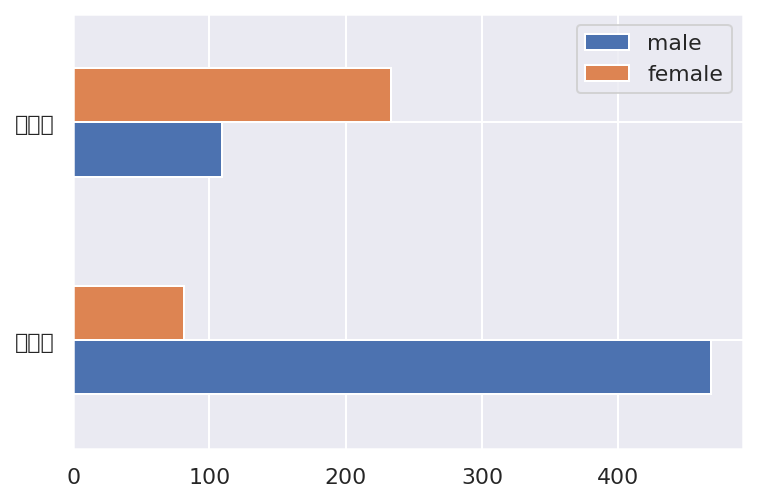

In [25]:
dt.plot(kind='barh')
plt.show()

#### 판다스 기초

In [26]:
train = pd.read_csv("/content/drive/My Drive/PythonWork/PythonBasic/work/10/taitanic.csv") 
print("train shape : ", train.shape) 


train shape :  (891, 12)


In [27]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [29]:
train['Survived'].mean()

0.3838383838383838



---


## 탐색적 데이터 분석 (EDA : Exploratory Data Analysis)


---




### 탐색적 데이터 분석 (EDA) 이란


+ 데이터를 수집했을때 이를 다양한 각도에서 관찰하고 이해하는 과정
+ 데이터의 분포 및 값을 검토하여 수집한 데이터가 어떤 것을 나타내는지를 더 잘 이해하고, 수집한 데이터에 대한 잠재적인 문제를 발견하여 본격적인 분석에 들어가기 전에 수집의사를 결정하고 판단


### 분석과정


 - 1) 분석의 목적과 변수가 무엇이 있는지 확인하고 개별 변수의 이름이나 설명을 갖는지 확인
   - 데이터가 어떤 용도로 만들어졌는지, 무엇을 설명하고자 하는지 확인하고
여러가지 질문이나 가설을 세움
 - 2) 데이터를 전체적으로 확인
   - 데이터에 문제가 있는지 없는지를 확인
   - 추가적으로 다양하게 데이터를 탐색
   - 수집한 데이터가 어떤 부분이 소실되어 결측값으로 나타나는지 확인
   - 어떠한 변수에 이상치를 갖고 있는지 확인
 - 3) 데이터의 개별 속성값을 관찰
   - 각 속성별로 갖고 있는 값이 예측한 범위와 분포를 갖는지를 확인
   - 그렇지 않다면 어떠한 이유로 예측한 범위와 분포를 갖고 있지 않은지를 확인
 - 4)속성 간의 관계에 초첨을 맟추어 개별 속성 관찰에서 찾아내지 못했던 패턴을 찾음
   - 예를 들면 상관관계의 시각화를 통해서 각각의 변수가 어떤 관계를 갖는지 확인


### 데이터의 유형 파악


데이터를 살펴보면서 변수의 의미나 방법 등을 확인하며, 데이터의 형태를 판단
 - 1) 수치형 자료로 보이지만 실상은 명목형 자료인 경우
  -  이 경우엔 해당 변수를 대신해서 정보를 따로 담고 있는 새로운 변수를 사용
 - 2) 명목형 자료로 보이지만 실상은 순서형 자료인 경우
  - 이 경우엔 해당 변수를 수치형 변수로 변환
 - 3) 합쳐서 하나로 만들 수 있는 변수인 경우 
  - 이 경우에는 해당 변수들을 합쳐서 조정
 - 4) 여러개로 나눌 수 있는 변수인 경우 
  - 이 경우에는 해당 변수를 나눠서 조정
 - 5) 결측값인지 0인지 분간이 힘든 관측치
  - 이 경우에는 다른 변수들과 비교하면서 살펴봄


### EDA의 형태


 - 1) 그림으로 표현할지 여부에 따라서 : 데이터의 분포를 확인하고자 한다면 그림이 더 적합하고, 정확한 값을 필요하다면 수치로 표현하는 것이 더 적합해.

 - 2) 단일변량 여부에 따라서 : 변수를 하나씩 확인할 것인지, 여러 변수를 동시에 확인할 것인지 여부
+ EDA 형태 분류
 - 1) 단일변량이면서 수치로 표현하고자 하는 경우
    - 범주형 자료 : 값의 범위, 빈도를 찾고자 할 때 빈도표를 작성하여 표현: 결측치가 존재한다면 비율이 100퍼센트가 안되기에 결측치의 유무를 판단할 수 있고, 구성비율을 파악할 수 있음
    - 양적 자료 : 개략적인 분포를 파악, 통계량(sample statistics)  
: 통계량의 중심위치(평균, 중위수 등)를 보고 자료의 치우친 정도를 판단하고,
산포(표준편차, IQR)를 통해서 퍼진 정도를 파악
 - 2) 단일변량이면서 그림으로 표현하고자 하는 경우  
    - 히스토그램 : 히스토그램을 통해서 자료의 분포가 어떻게 되는지, 어떤 모형을 가정할지, 이상치의 여부 등을 판단가능하고 연속형 데이터에 사용하면 전체적인 분포를 파악
    - 막대그래프 : 범주형 자료의 분포 파악할 수 있으며, 연속형 데이터에 사용하면 전체적인 분포를 파악
    - 상자그림 : 이상치 판단, 자료의 치우침 여부 판단
    - QQplot : 표본이 정규분포에 근사시킬 수 있는지 여부를 판단할 때 사용
 - 3) 다변량이면서 수치로 표현하는 경우
    - 교차표 :범주형 자료에 사용되며, 각 행과 열에 변수를 지정하여 사용하며, 각 셀의 빈도나 비율을 파악
    - 공분산과 상관계수 : 두 변수가 양적 변수인 경우에 두 변수의 선형의 상관성에 대해서 판단할 때 사용
 - 4) 다변량이면서 그림으로 표현하는 경우
    - 산점도 : 변수가 양적 변수인 경우, 종속 변수를 y축에 두고 그리며 변수의 관계를 나타냄


##3.EDA

### 타이타닉 데이터 항목 


- PassengerId : 탑승객의 고유 아이디
- Survival : 생존여부(0: 사망, 1: 생존)
- Pclass : 객실의 등급(1: 1등급, 2: 2등급, 3: 3등급)
- Name : 이름
- Sex : 성별
- Age : 나이
- Sibsp : 함께 탑승한 형제자매, 아내 남편의 수
- Parch: 함께 탑승한 부모, 자식의 수
- Ticket: 티켓번호
- Fare: 티켓의 요금
- Cabin: 객실번호
- Embarked: 승선한 항구명(C = Cherbourg, Q = Queenstown, S = Southampton)

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 목적변수(target value) 확인
+ 생존여부(Survival) 열 자료 파악
+ 비율 그래프 그리기

In [32]:
train['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [33]:
train['Sex'].value_counts(normalize=True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

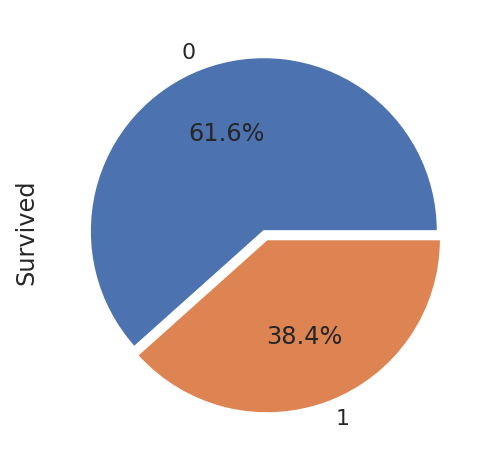

In [36]:
#explode : 파이챠트 내의 파이 간격
#autopct : 파이전체 대비 백분율
train['Survived'].value_counts().plot(kind='pie',explode=[0,0.05],autopct='%1.1f%%') 

plt.show()

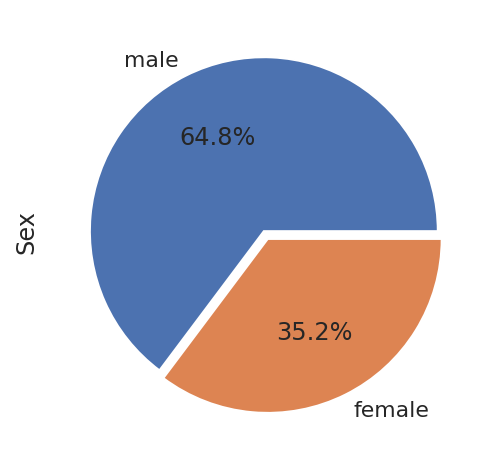

In [37]:
train['Sex'].value_counts().plot(kind='pie',explode=[0,0.05],autopct='%1.1f%%') 

plt.show()

### 결측치 확인

+ .isna() : 누락 데이터의 위치 , isnull()과 동일
+ .isna().sum() : 누락 데이터 개수 파악

#### train 데이터 결측치 찾기

In [38]:
#결측치가 있는 위치 파악
train.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [39]:
#결측치의 개수 파악
train.isna().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

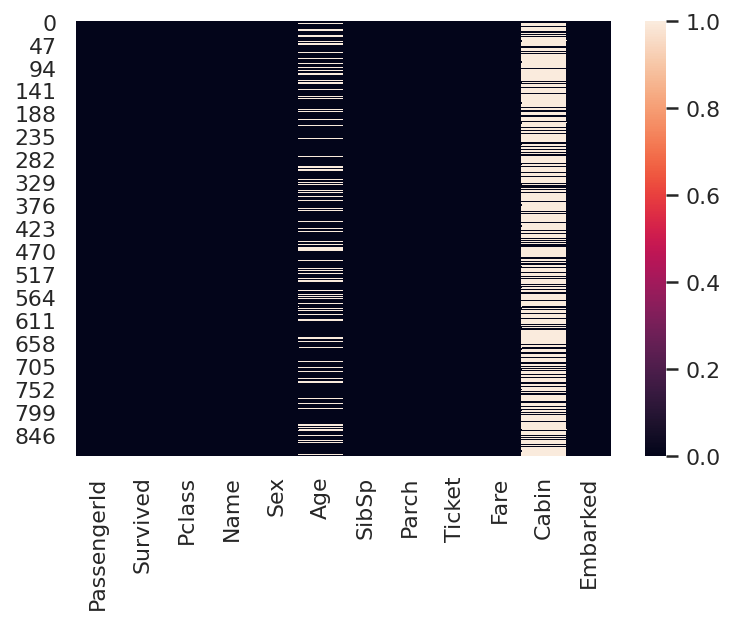

In [40]:
#결측치 시각화
sns.heatmap(train.isna())

In [42]:
train.isnull().sum() != 0

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [45]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [46]:
train.columns[train.isna().sum() != 0]

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [50]:
train[['Age','Cabin', 'Embarked']]

,Age,Cabin,Embarked
0,22.0,NaN,S
1,38.0,C85,C
2,26.0,NaN,S
3,35.0,C123,S
4,35.0,NaN,S
...,...,...,...
886,27.0,NaN,S
887,19.0,B42,S
888,NaN,NaN,S
889,26.0,C148,C


In [47]:
#누락 데이터가 있는 열의 데이터 찾기
train1 = train[train.columns[train.isnull().sum()!=0]]
train1

,Age,Cabin,Embarked
0,22.0,NaN,S
1,38.0,C85,C
2,26.0,NaN,S
3,35.0,C123,S
4,35.0,NaN,S
...,...,...,...
886,27.0,NaN,S
887,19.0,B42,S
888,NaN,NaN,S
889,26.0,C148,C


In [52]:
nag = train.isna().sum() 

In [53]:
nag = nag[nag != 0 ]

In [55]:
nag = nag.sort_values()
nag

Embarked      2
Age         177
Cabin       687
dtype: int64

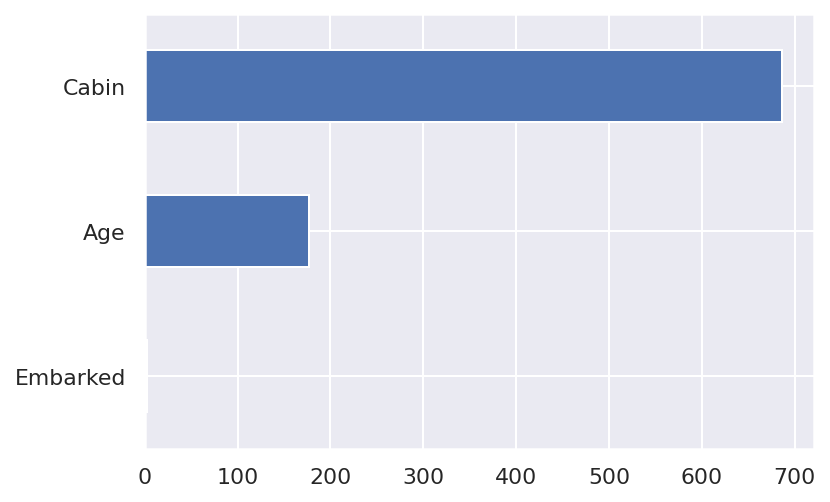

In [56]:
nag.plot(kind='barh')

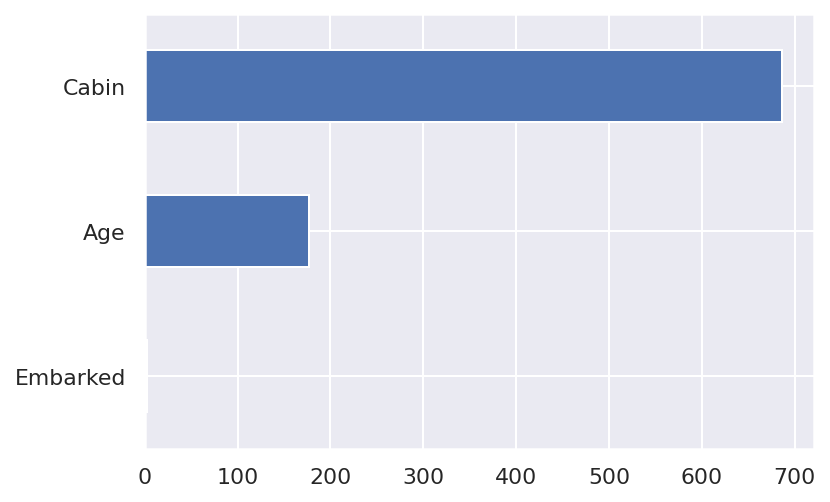

In [51]:
#누락데이터 열 개수
train_nag = train1.isna().sum().sort_values()
train_nag.plot(kind='barh')

#### ※Cabin(객실번호) 자료가 많이 누락됨을 파악

### 변수 관찰(Observation of variables) 

+ enumarate() 함수 : 인덱스 번호와 컬렉션의 원소를 tuple형태로 반환
+ .select_dtypes(include = 데이터타입) : 지정한 데이터 타입 유형의 열을 찾아줌

In [70]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [72]:
train[['Name','Sex', 'Ticket',  'Cabin', 'Embarked']]

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


In [71]:
train.select_dtypes('object')

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


In [58]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 사망자 to 생존자
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   male    2 non-null      int64
 1   female  2 non-null      int64
dtypes: int64(2)
memory usage: 128.0+ bytes


In [59]:
dt.index

Index(['사망자', '생존자'], dtype='object')

In [60]:
dt.columns

Index(['male', 'female'], dtype='object')

In [61]:
for item in dt.index :
    print(item)

사망자
생존자


In [62]:
for i, item in enumerate(dt.index) :
    print(i, item)

0 사망자
1 생존자


In [64]:
lt = ['a', 'b', 'c']

for idx in range(len(lt)) :
    print(idx, lt[idx])

0 a
1 b
2 c


In [66]:
for item in lt:
    print(item)

a
b
c


In [69]:
for idx, item in enumerate(lt):
    print(idx, item)

0 a
1 b
2 c


#### train 데이터 관찰

In [ ]:
#train 정보
train.info()

##### 문자열 항목에 대한 관찰(성별, 승선항구)

In [83]:
#문자열을 포함하는 열을 추출 확인
train.select_dtypes(include = "object")

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


In [84]:
#문자열을 가진 열 중 필요하지 않는 열 삭제
train1 = train.drop(['Name', 'Ticket',	'Cabin'], axis=1)
train1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


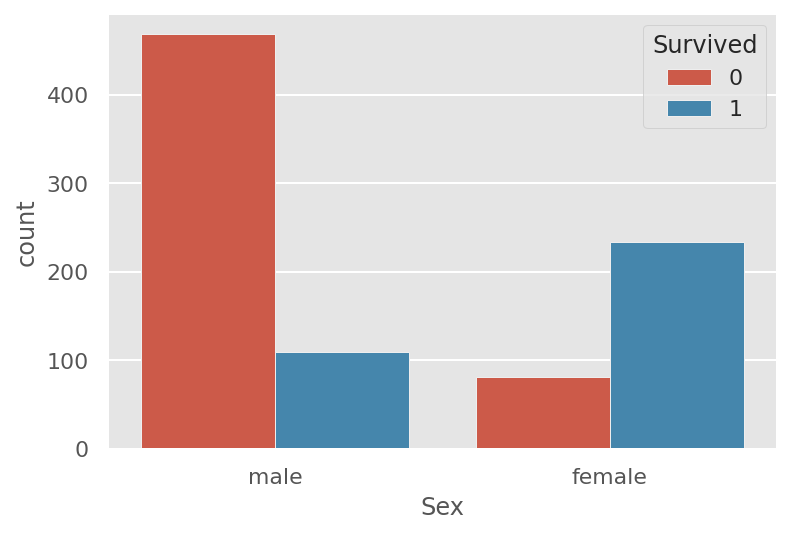

In [85]:
#성별이 생존율에 영향을 미치는지 확인
plt.style.use('ggplot')
sns.countplot('Sex',hue = "Survived",data = train1)

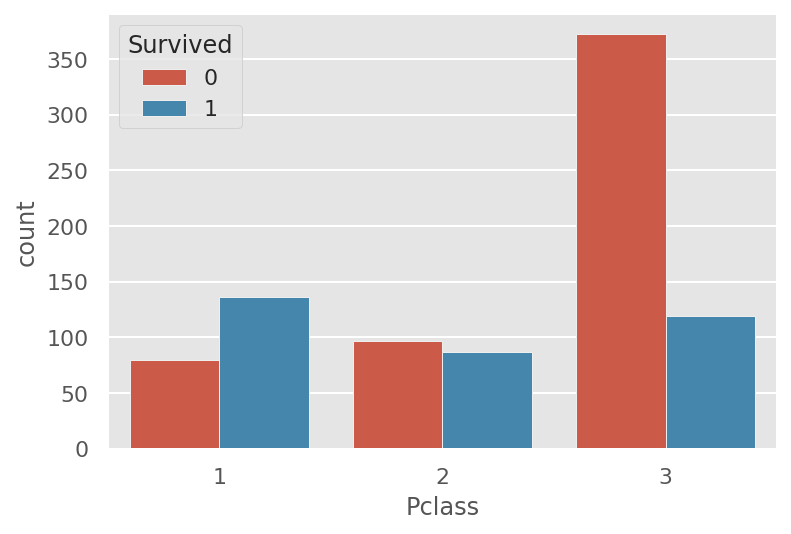

In [76]:
#등급별 생존율에 영향을 미치는지 확인
plt.style.use('ggplot')
sns.countplot('Pclass',hue = "Survived",data = train1)

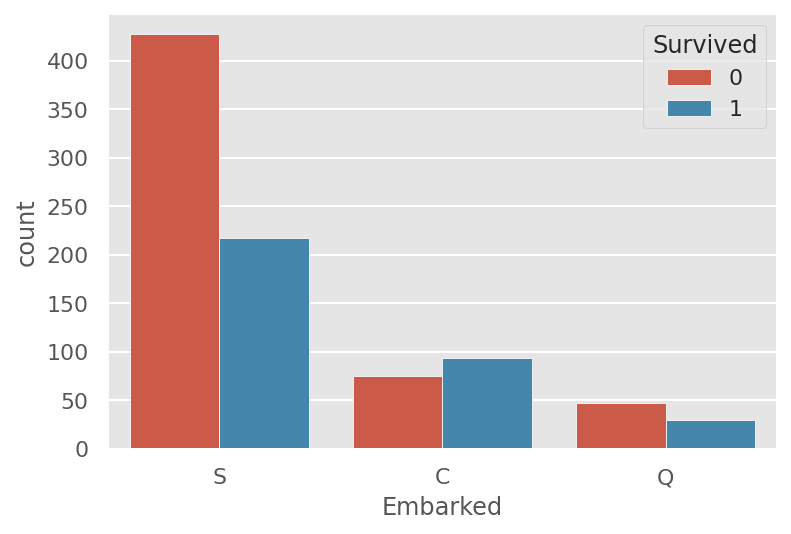

In [77]:
#승선한 항구가 생존율에 영향을 미치는지 확인
plt.style.use('ggplot')
sns.countplot('Embarked',hue = "Survived",data = train1)

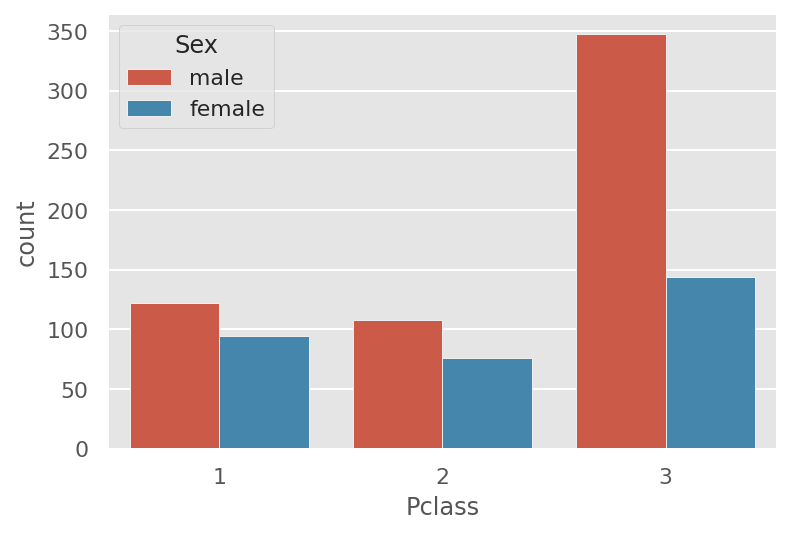

In [78]:
#등급별 남여에 영향을 미치는지 확인
plt.style.use('ggplot')
sns.countplot('Pclass',hue = "Sex",data = train1)

In [81]:
train1.select_dtypes('object').columns

Index(['Sex', 'Embarked'], dtype='object')

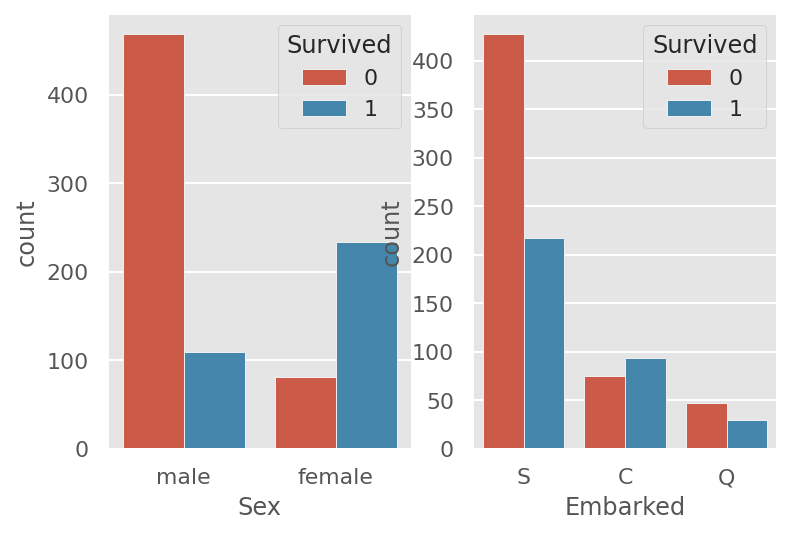

In [88]:
plt.subplot(1,2,1)
sns.countplot('Sex',hue = "Survived",data = train1)

plt.subplot(1,2,2)
sns.countplot('Embarked',hue = "Survived",data = train1)


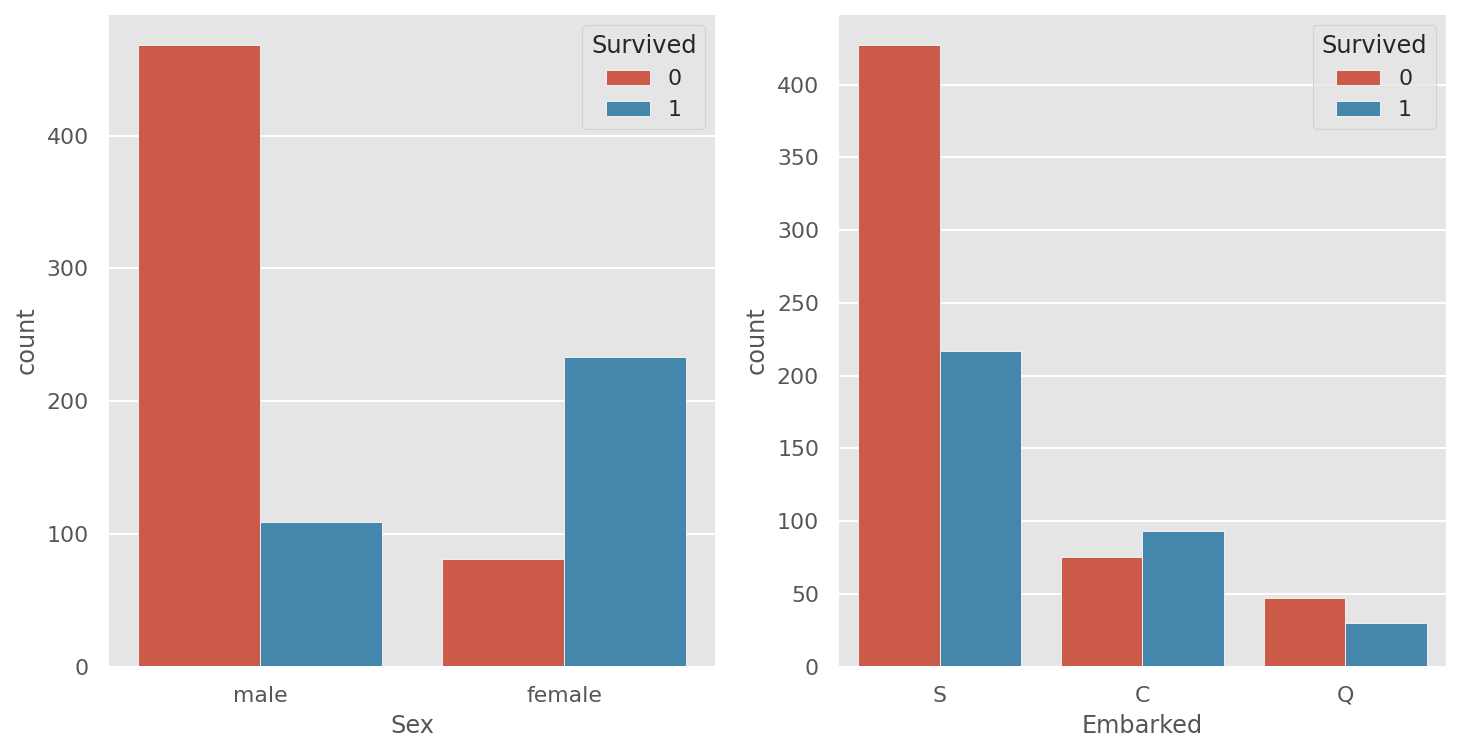

In [86]:
#enumerate를 이용하여 subplot그리기
plt.figure(figsize=(12,6))
plt.style.use('ggplot')
for i, col in enumerate(train1.select_dtypes('object').columns):
    plt.subplot(1,len(train1.select_dtypes('object').columns),i+1)
    sns.countplot(col,hue = "Survived",data = train1)

In [89]:
train1['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [90]:
train1['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

###### **※남성인 경우와 S항구에서 탑승한 인원은 생존율이 낮음**

##### 정수 항목에 대한 관찰(등급별, 배우자, 부모자식 수)

In [91]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [92]:
train.select_dtypes('int')

,PassengerId,Survived,Pclass,SibSp,Parch
0,1,0,3,1,0
1,2,1,1,1,0
2,3,1,3,0,0
3,4,1,1,1,0
4,5,0,3,0,0
...,...,...,...,...,...
886,887,0,2,0,0
887,888,1,1,0,0
888,889,0,3,1,2
889,890,1,1,0,0


In [93]:
train1 = train.select_dtypes('int').drop(['PassengerId','Survived'], axis=1)
train1.head()


,Pclass,SibSp,Parch
0,3,1,0
1,1,1,0
2,3,0,0
3,1,1,0
4,3,0,0


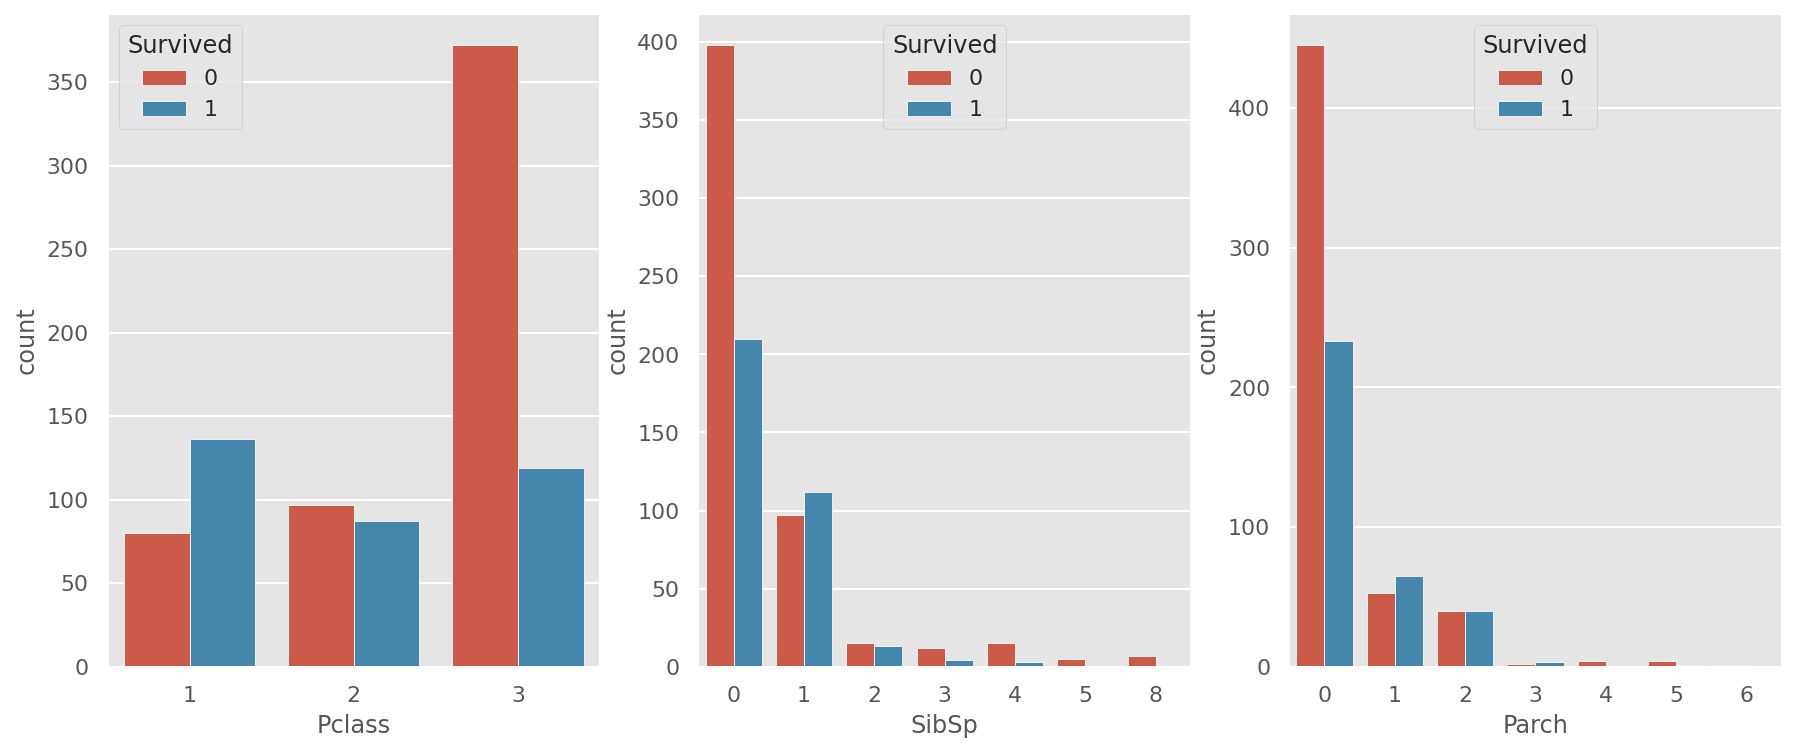

In [94]:
plt.figure(figsize=(15,6))
plt.style.use('ggplot')
for i, col in enumerate(train1.columns):
    plt.subplot(1,len(train1.columns),i+1)
    sns.countplot(col,hue = "Survived",data = train)


<Figure size 1080x432 with 0 Axes>

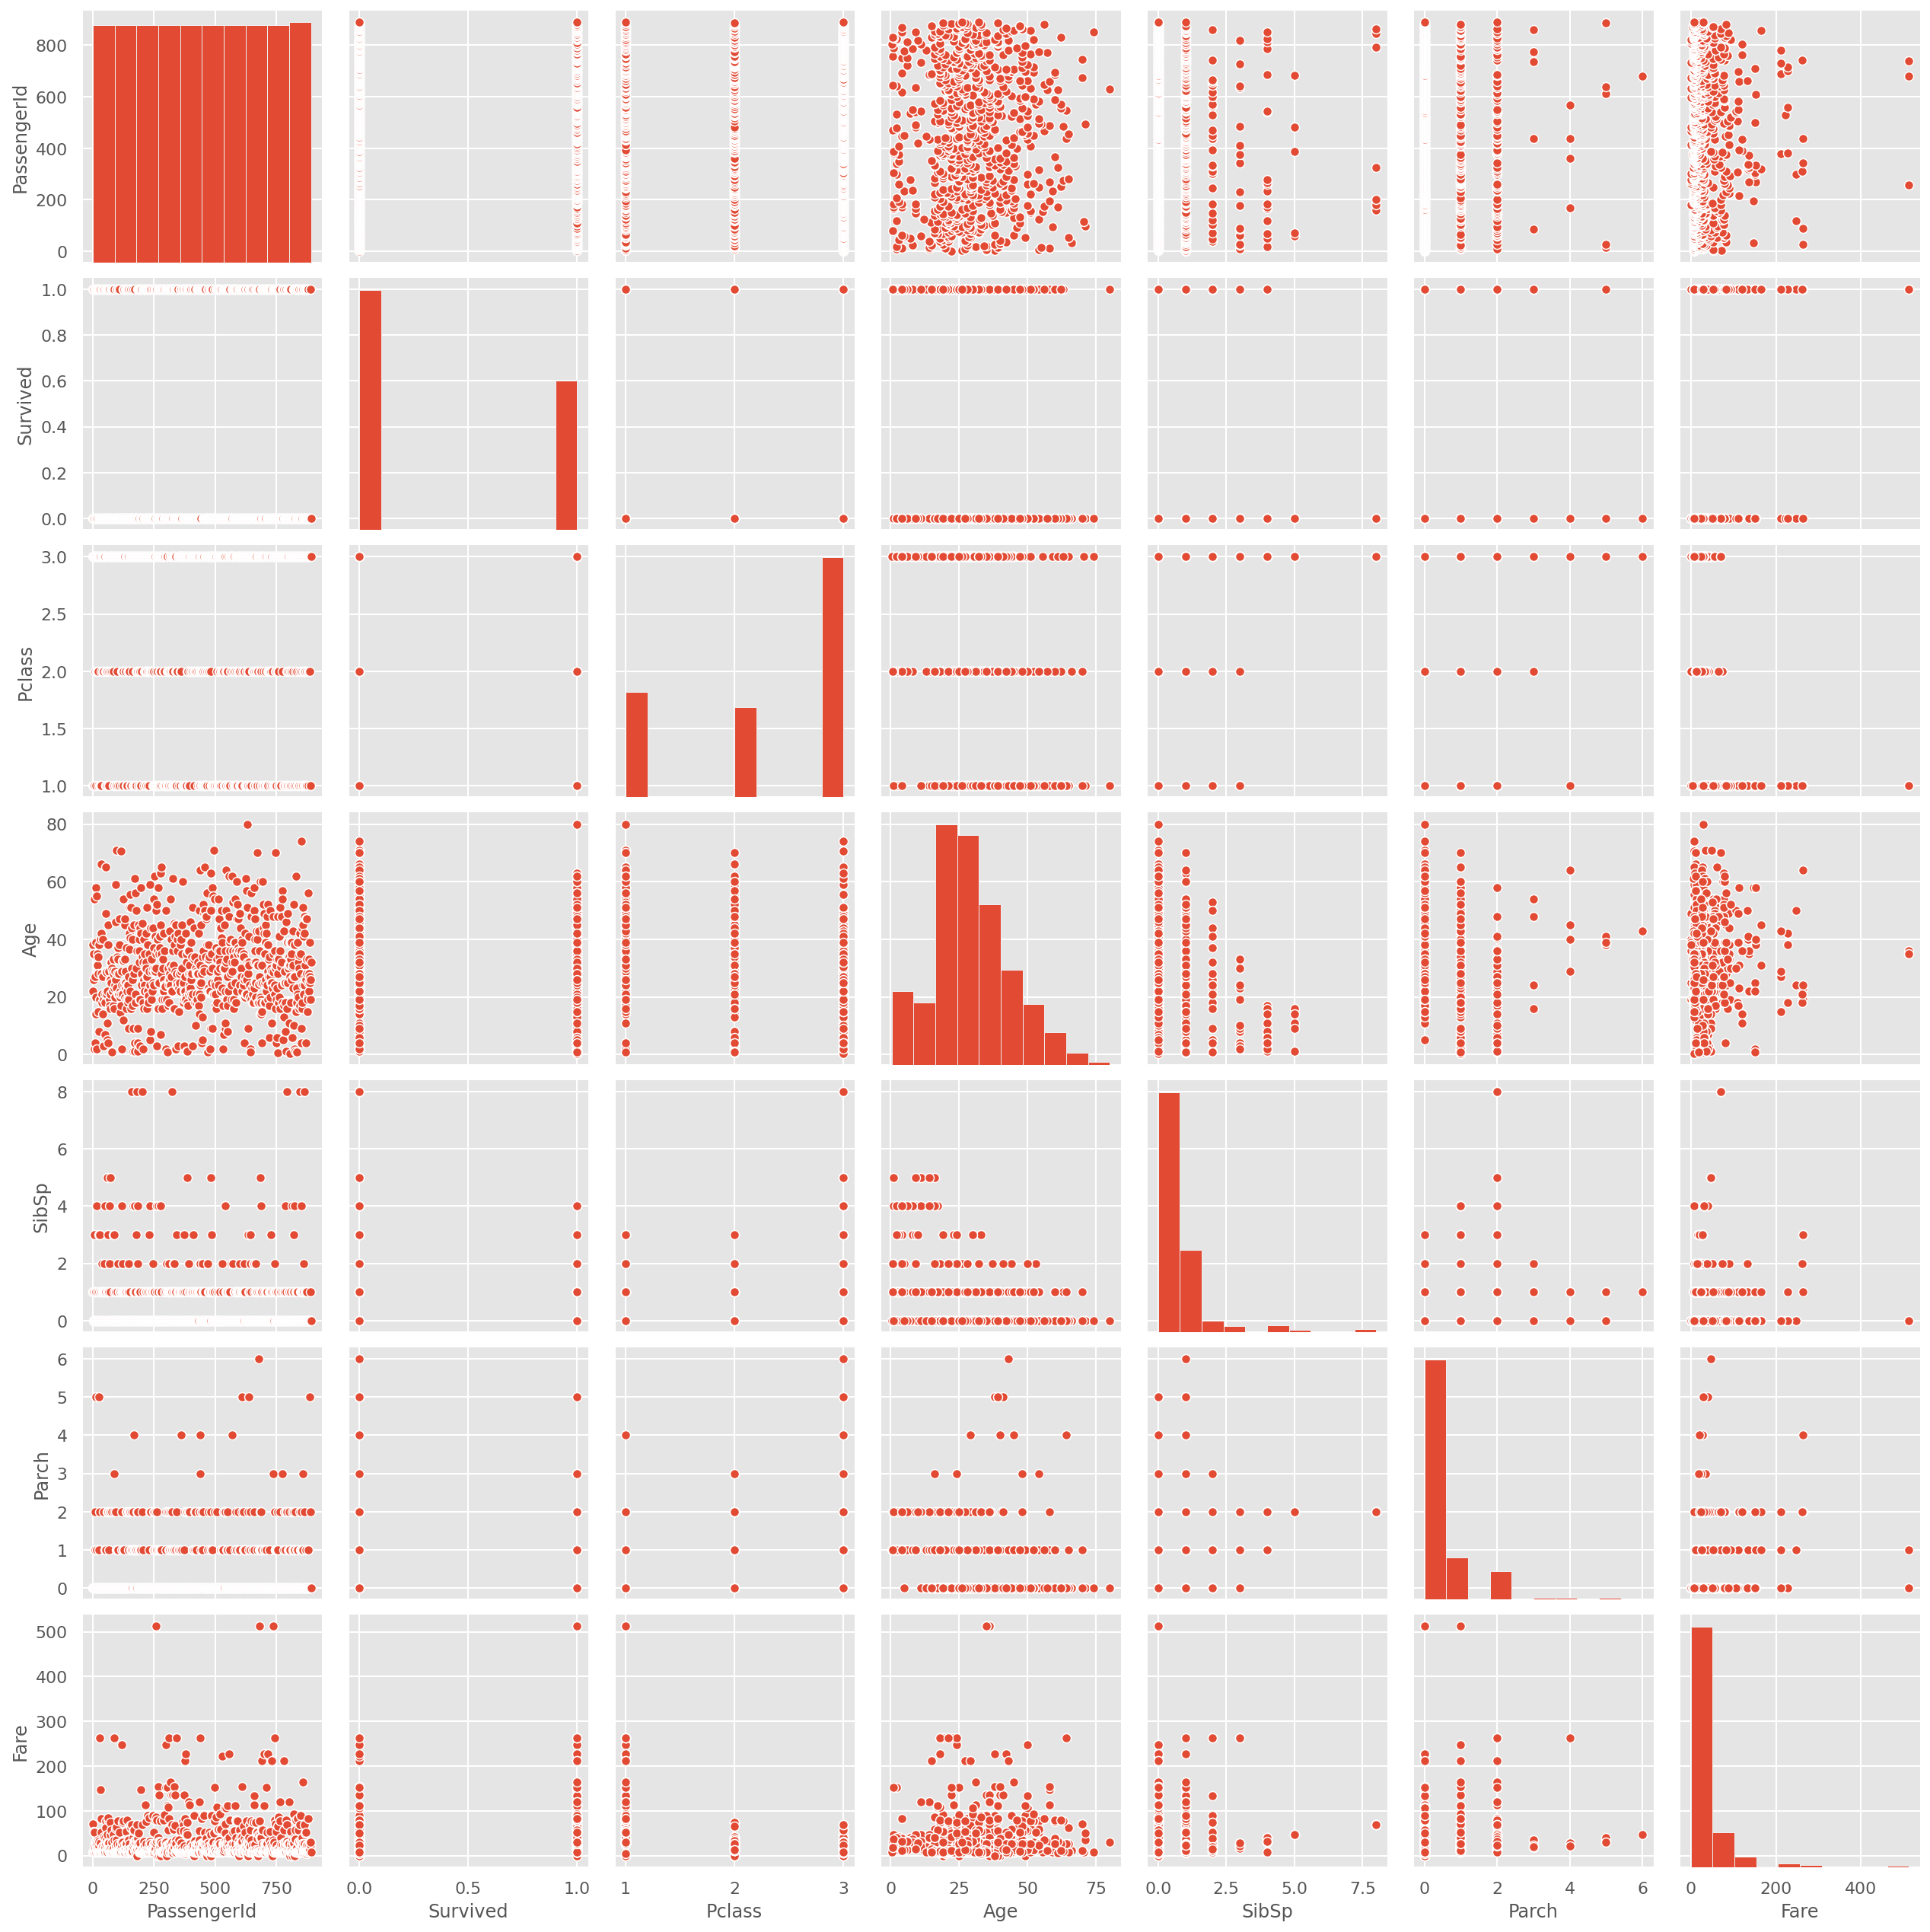

In [106]:
plt.figure(figsize=(15,6))
sns.pairplot(data=train)

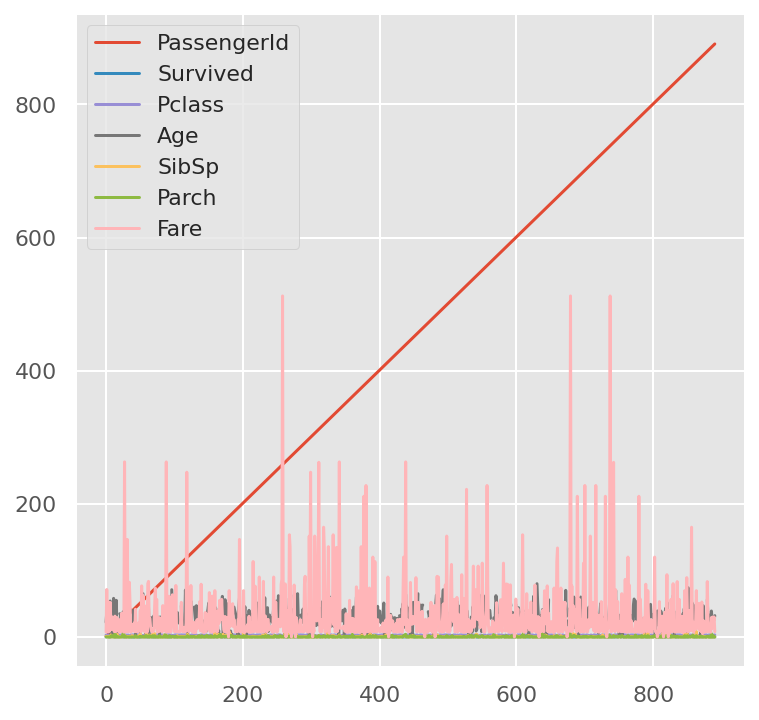

In [103]:
train.plot(figsize=( 6,6))

In [120]:
round(5 / 2, 0)

2.0

In [121]:
import math
def snsSurvived(cols) :
    row = math.ceil(len(cols) / 2)
    plt.figure(figsize=(row* 6,6))
    plt.style.use('ggplot')

    print(row)
    for i, col in enumerate(cols):
        plt.subplot(row,2,i+1)
        sns.countplot(col,hue = "Survived",data = train)


4


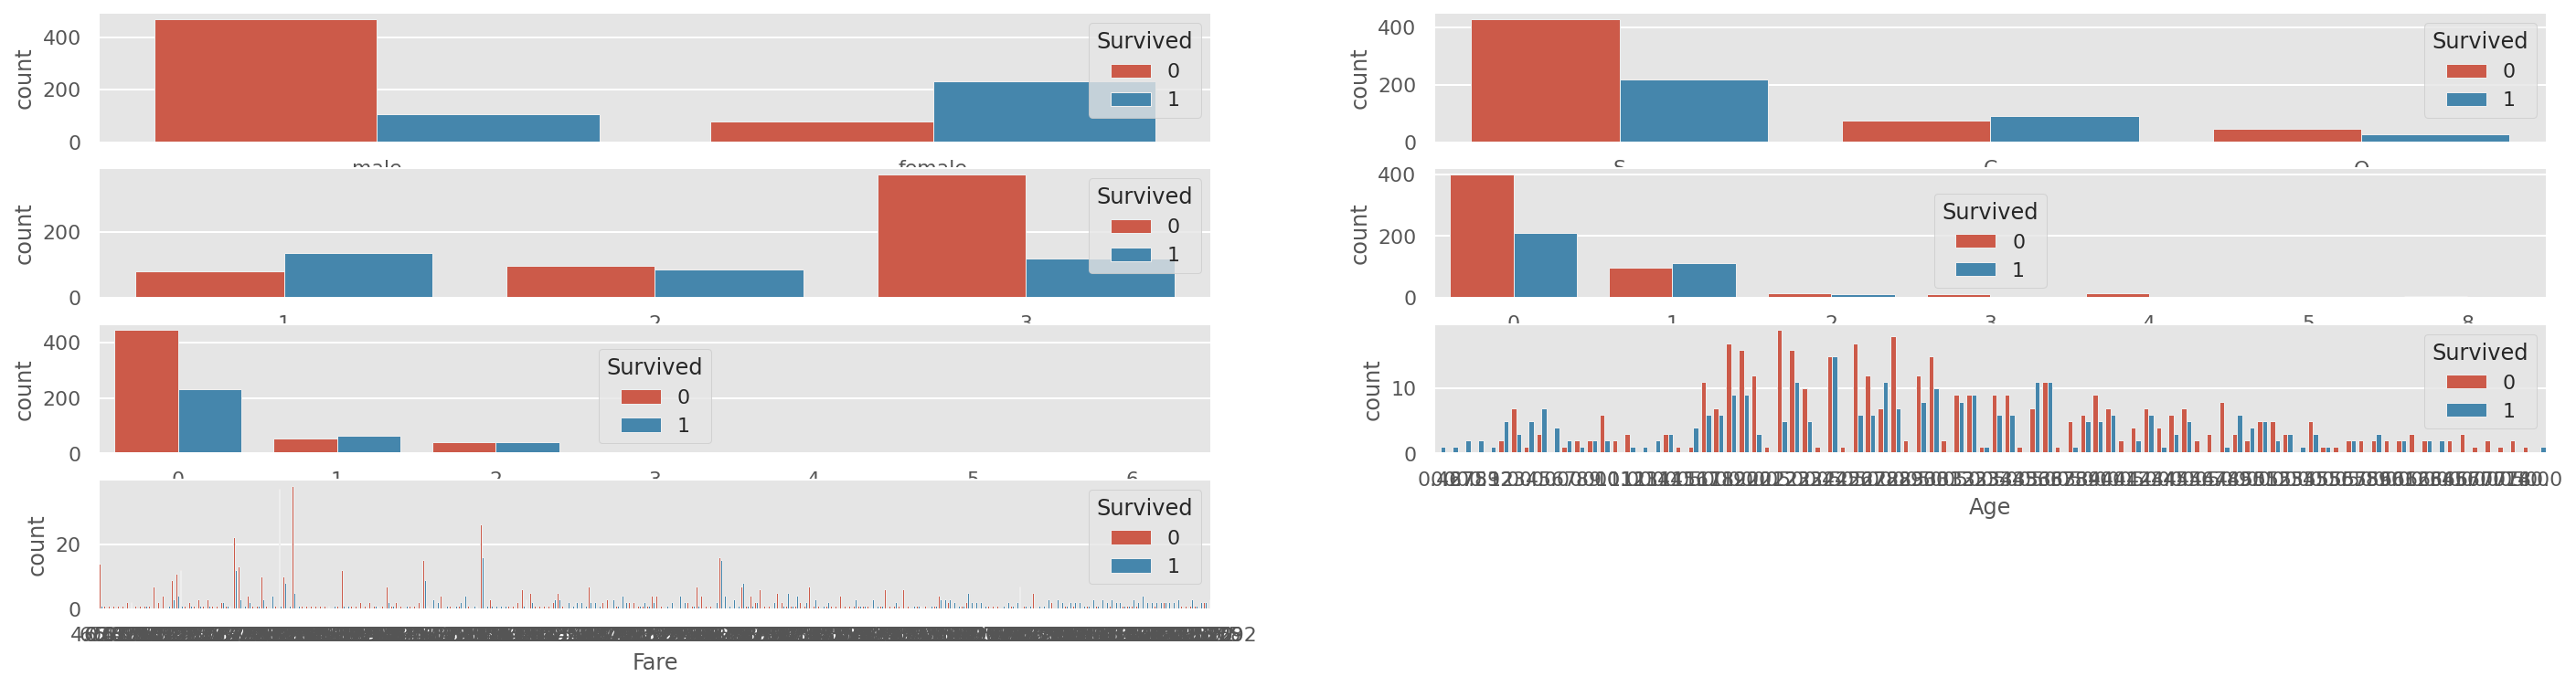

In [125]:
snsSurvived(['Sex' ,'Embarked', 'Pclass',	'SibSp',	'Parch', 'Age',	'Fare'])

###### **※SibSp 및 Parch가 0이고 Pclass가 3 인 사람은 생존률이 낮음**

##### 실수 항목에 대한 관찰(나이, 티켓요금)

In [124]:
train1 = train.select_dtypes(include = "float")
train1.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


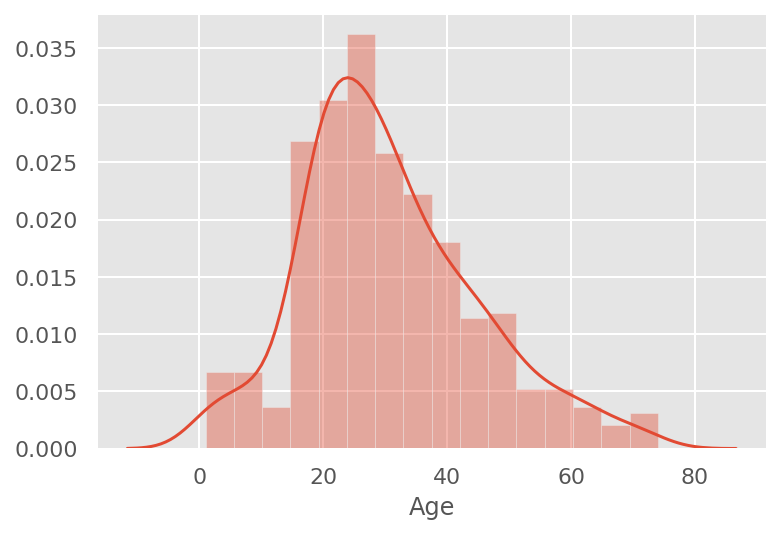

In [134]:
sns.distplot(train[train["Survived"]==0]['Age'])

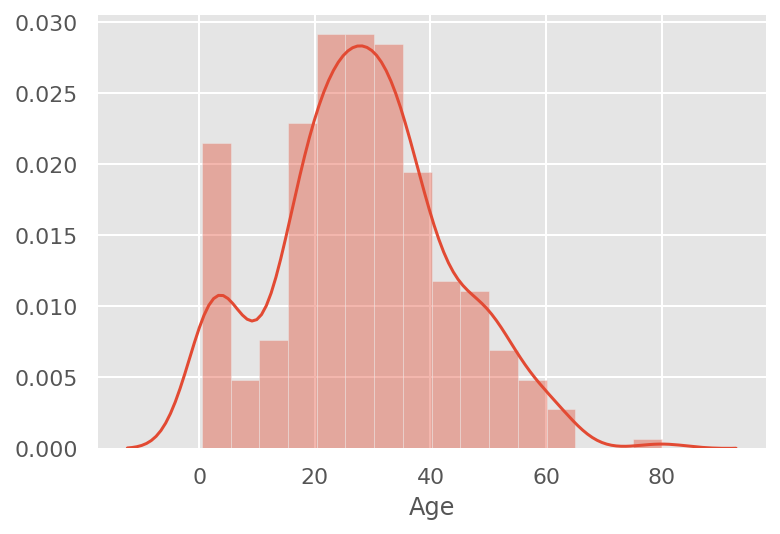

In [135]:
sns.distplot(train[train["Survived"]==1]['Age'])

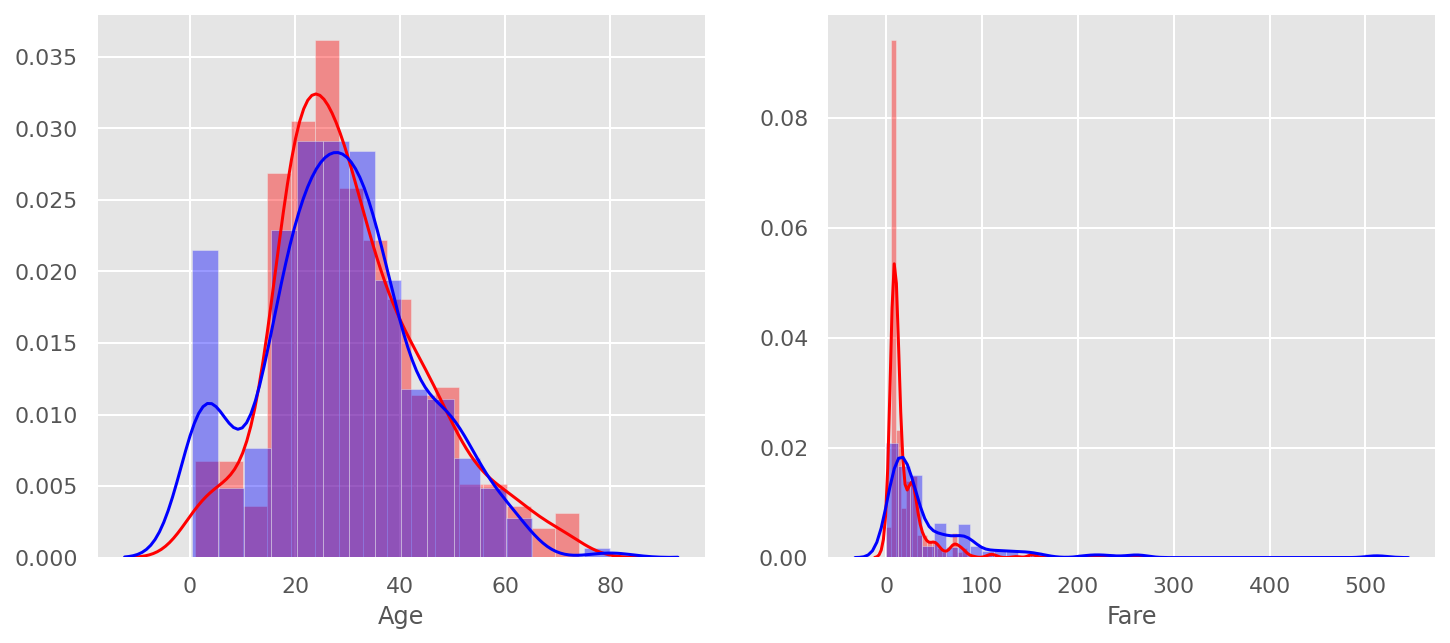

In [126]:

plt.figure(figsize=(12,5))
plt.style.use('ggplot')
for i, col in enumerate(train1.columns):
    plt.subplot(1,len(train1.columns),i+1)
    sns.distplot(train[train["Survived"]==0][col],color='red')
    sns.distplot(train[train["Survived"]==1][col],color='blue')

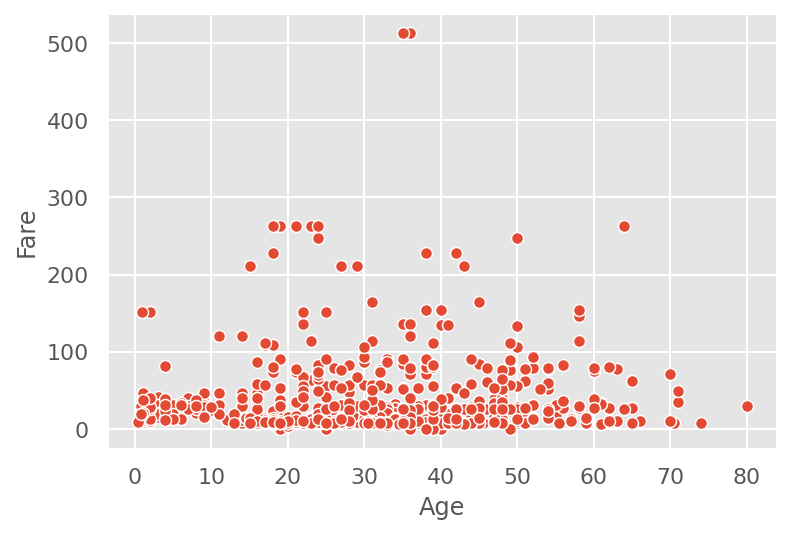

In [137]:
sns.scatterplot(x='Age', y='Fare', data=train)

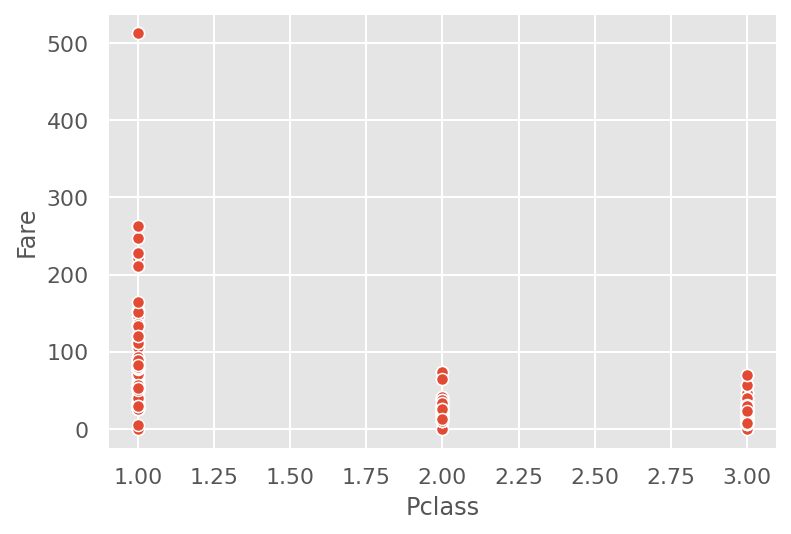

In [136]:
sns.scatterplot(x='Pclass', y='Fare', data=train)

###### **※SibSp 및 Parch가 0이고 Pclass가 3 인 사람은 생존률이 낮음**

##### 가족 수 항목 추가 : SibSp + Parch + 1

In [138]:
train['Family'] = train['Parch'] + train['SibSp'] + 1

In [ ]:
train.head()

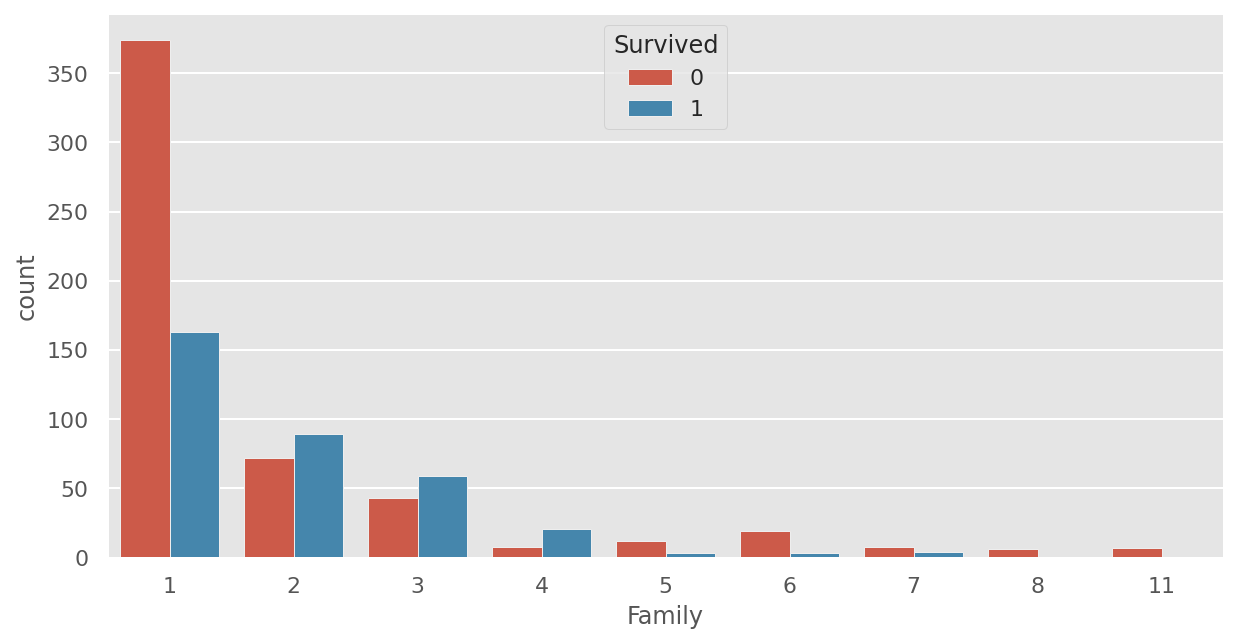

In [140]:
plt.figure(figsize=(10,5))
plt.style.use('ggplot')
sns.countplot('Family', hue='Survived', data=train)

##### 나이를 등급으로 구분하기

+ pd.cut() : 
 - 동일 길이로 나누어서 범주를 만든 후 GroupBy()로 그룹별 통계량 구하기

+ pd.qcut()
 - 동일 개수로 나누어서 범주를 만든 후 GroupBy()로 그룹별 통계량 구하기
 

In [141]:
train.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [142]:
train.groupby('Age')['Survived'].mean()

Age
0.42     1.0
0.67     1.0
0.75     1.0
0.83     1.0
0.92     1.0
        ... 
70.00    0.0
70.50    0.0
71.00    0.0
74.00    0.0
80.00    1.0
Name: Survived, Length: 88, dtype: float64

In [153]:
train['Age_group'] = pd.cut(train['Age'], 5, labels=False)
train.groupby('Age_group')['Survived'].mean()

Age_group
0.0    0.550000
1.0    0.369942
2.0    0.404255
3.0    0.434783
4.0    0.090909
Name: Survived, dtype: float64

In [151]:
train['Age_group'] = pd.qcut(train['Age'], 5)
train.groupby('Age_group')['Survived'].mean()

Age_group
(0.419, 19.0]    0.481707
(19.0, 25.0]     0.328467
(25.0, 31.8]     0.393701
(31.8, 41.0]     0.437500
(41.0, 80.0]     0.373239
Name: Survived, dtype: float64

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

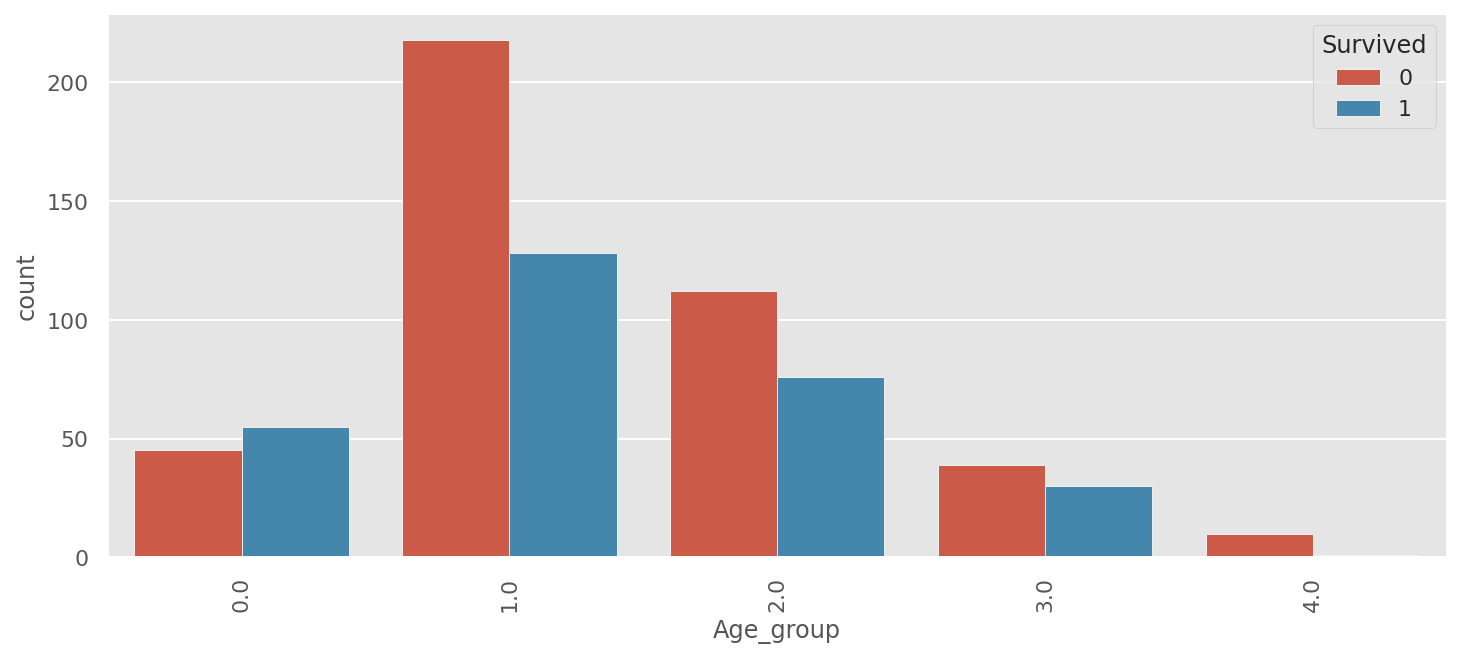

In [154]:
plt.figure(figsize=(12,5))
sns.countplot('Age_group', hue='Survived', data=train)
plt.xticks(rotation=90)

In [155]:
train['Age_group'] = pd.qcut(train['Age'], 10)
train.groupby('Age_group')['Survived'].mean()

Age_group
(0.419, 14.0]    0.584416
(14.0, 19.0]     0.390805
(19.0, 22.0]     0.283582
(22.0, 25.0]     0.371429
(25.0, 28.0]     0.393443
(28.0, 31.8]     0.393939
(31.8, 36.0]     0.483516
(36.0, 41.0]     0.358491
(41.0, 50.0]     0.397436
(50.0, 80.0]     0.343750
Name: Survived, dtype: float64

##### Cabin(객실번호) 

In [162]:
train['Cabin'].value_counts()

None           687
C23 C25 C27      4
B96 B98          4
G6               4
D                3
              ... 
B86              1
B69              1
C7               1
B19              1
C90              1
Name: Cabin, Length: 148, dtype: int64

In [157]:
train['Cabin'].isna().sum()

687

In [160]:
#Cabin의 결측치를 None문자열로 채우기
train["Cabin"].fillna("None",inplace=True)

In [161]:
train['Cabin'].isna().sum()

0

In [163]:
train["Cabin_first"] = train["Cabin"].str[0]

In [164]:
train["Cabin_first"].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin_first, dtype: int64

In [165]:
train1 = train[train["Cabin_first"] != 'N']

In [166]:
train1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Age_group,Cabin_first
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,"(36.0, 41.0]",C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,"(31.8, 36.0]",C
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,"(50.0, 80.0]",E
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,3,"(0.419, 14.0]",G
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,1,"(50.0, 80.0]",C


In [167]:
train1["Cabin_first"].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin_first, dtype: int64

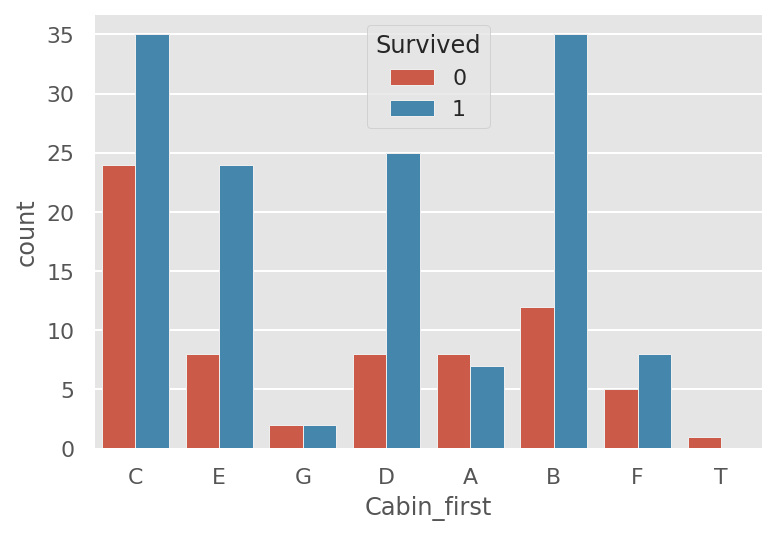

In [168]:
sns.countplot('Cabin_first', hue='Survived', data=train1)

##### Name(이름) 

In [169]:
train['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [182]:
train['Name'].str.split(',')[1]

['Cumings', ' Mrs. John Bradley (Florence Briggs Thayer)']

In [184]:
train['Name'].str.split(',', expand=True)[1]

0                                  Mr. Owen Harris
1       Mrs. John Bradley (Florence Briggs Thayer)
2                                      Miss. Laina
3               Mrs. Jacques Heath (Lily May Peel)
4                                Mr. William Henry
                          ...                     
886                                    Rev. Juozas
887                           Miss. Margaret Edith
888                 Miss. Catherine Helen "Carrie"
889                                Mr. Karl Howell
890                                    Mr. Patrick
Name: 1, Length: 891, dtype: object

In [185]:
train['First_Name'] = train['Name'].str.split(',', expand=True)[1].str.split('.', expand=True)[0].str.strip()

In [187]:
 train['First_Name'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Sir               1
Lady              1
Mme               1
Don               1
Capt              1
Ms                1
the Countess      1
Jonkheer          1
Name: First_Name, dtype: int64

In [186]:
train['First_Name']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: First_Name, Length: 891, dtype: object

In [198]:
lt = ['Mr ','Miss ', 'Mrs ', 'Master ']

lt = [name.strip() for name in lt]
lt

['Mr', 'Miss', 'Mrs', 'Master']

In [195]:
lt

['Mr', 'Miss', 'Mrs', 'Master']

In [199]:
lt = [0 if name == 'Mr' else 1 if name == 'Miss' else 2 if name == 'Mrs' else 3 for name in lt]
lt

[0, 1, 2, 3]

In [188]:
train['First_Name_label'] = [0 if name=='Mr' else 1 if name=='Mrs'  else 2 if name=='Miss' else 3 if name=='Master' else 4 for name in train['First_Name']]

In [202]:
train['First_Name_label'].value_counts().sort_index()

0    517
1    125
2    182
3     40
4     27
Name: First_Name_label, dtype: int64

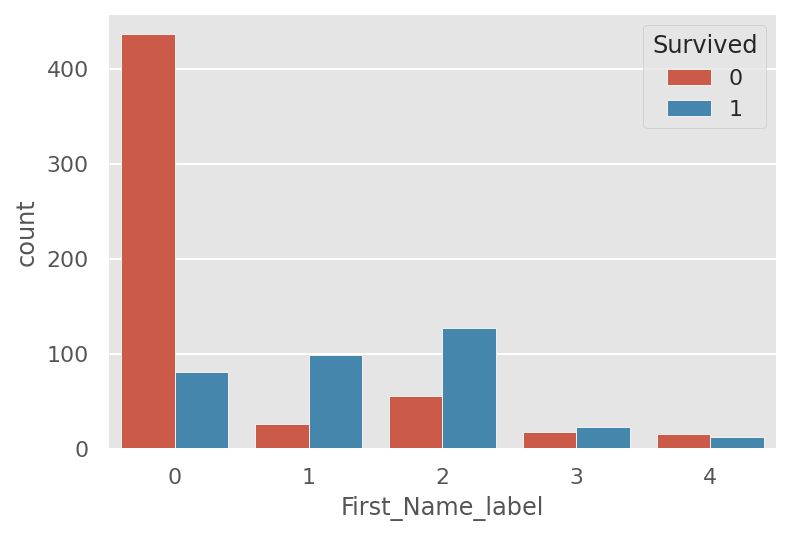

In [203]:
sns.countplot('First_Name_label', hue='Survived', data=train)

##### Ticket(티켓)
+ .nunique() : 유니크한 value의 개수를 나타냄

In [214]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   PassengerId       891 non-null    int64   
 1   Survived          891 non-null    int64   
 2   Pclass            891 non-null    int64   
 3   Name              891 non-null    object  
 4   Sex               891 non-null    object  
 5   Age               714 non-null    float64 
 6   SibSp             891 non-null    int64   
 7   Parch             891 non-null    int64   
 8   Ticket            891 non-null    object  
 9   Fare              891 non-null    float64 
 10  Cabin             891 non-null    object  
 11  Embarked          889 non-null    object  
 12  Family            891 non-null    int64   
 13  Age_group         714 non-null    category
 14  Cabin_first       891 non-null    object  
 15  First_Name        891 non-null    object  
 16  First_Name_label  891 non-

In [204]:
train['Ticket'].value_counts()

CA. 2343      7
1601          7
347082        7
347088        6
3101295       6
             ..
2663          1
27849         1
C.A. 29566    1
3474          1
330923        1
Name: Ticket, Length: 681, dtype: int64

In [207]:
train['Ticket'].nunique()

681

In [208]:
train.groupby('Ticket')['PassengerId'].count()

Ticket
110152         3
110413         3
110465         2
110564         1
110813         1
              ..
W./C. 6608     4
W./C. 6609     1
W.E.P. 5734    1
W/C 14208      1
WE/P 5735      2
Name: PassengerId, Length: 681, dtype: int64

In [209]:
ticket_group = train.groupby('Ticket')['PassengerId'].count().reset_index()
ticket_group.columns = ['Ticket',"Ticket_freq"]

In [210]:
ticket_group

,Ticket,Ticket_freq
0,110152,3
1,110413,3
2,110465,2
3,110564,1
4,110813,1
...,...,...
676,W./C. 6608,4
677,W./C. 6609,1
678,W.E.P. 5734,1
679,W/C 14208,1


In [211]:
ticket_group['Ticket_freq'].value_counts()

1    547
2     94
3     21
4     11
7      3
6      3
5      2
Name: Ticket_freq, dtype: int64

In [212]:
train_t = train.merge(ticket_group, on = "Ticket")
train_t.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Age_group,Cabin_first,First_Name,First_Name_label,Ticket_freq
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,None,S,2,"(19.0, 22.0]",N,Mr,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,"(36.0, 41.0]",C,Mrs,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,None,S,1,"(25.0, 28.0]",N,Miss,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,"(31.8, 36.0]",C,Mrs,1,2
4,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1000,C123,S,2,"(36.0, 41.0]",C,Mr,0,2


In [216]:
train_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   PassengerId       891 non-null    int64   
 1   Survived          891 non-null    int64   
 2   Pclass            891 non-null    int64   
 3   Name              891 non-null    object  
 4   Sex               891 non-null    object  
 5   Age               714 non-null    float64 
 6   SibSp             891 non-null    int64   
 7   Parch             891 non-null    int64   
 8   Ticket            891 non-null    object  
 9   Fare              891 non-null    float64 
 10  Cabin             891 non-null    object  
 11  Embarked          889 non-null    object  
 12  Family            891 non-null    int64   
 13  Age_group         714 non-null    category
 14  Cabin_first       891 non-null    object  
 15  First_Name        891 non-null    object  
 16  First_Name_label  891 non-

In [217]:
train_t['Ticket_freq'].value_counts()

1    547
2    188
3     63
4     44
7     21
6     18
5     10
Name: Ticket_freq, dtype: int64

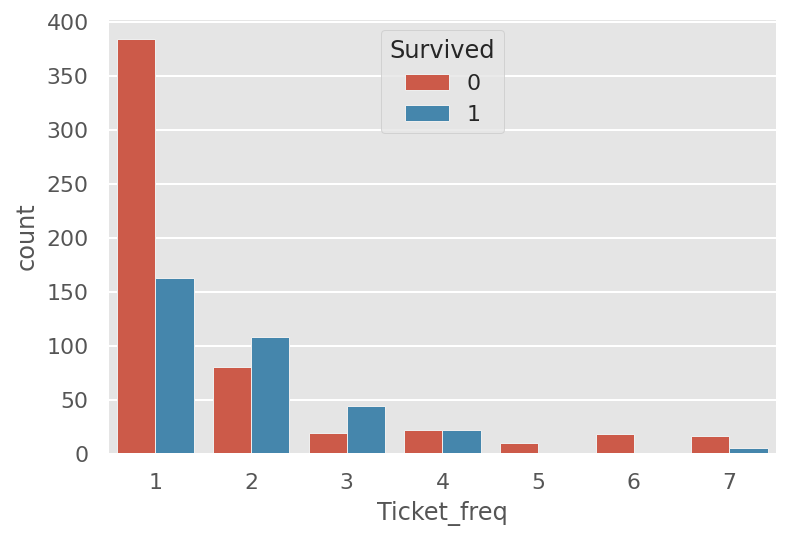

In [218]:
sns.countplot('Ticket_freq', hue='Survived', data=train_t)

In [ ]:
test1 = test[['Sex', 'Embarked']]
test1.head()

In [ ]:
plt.figure(figsize=(12,6))
plt.style.use('ggplot')
sns.countplot('Sex',hue = "Embarked",data = test1)

In [ ]:
test1['Sex'].value_counts()

##### 성별, 등급 별 생존율
+ unstack() : groupby() 결과를 피봇 데이블 형태 변경

In [ ]:
train.info()

In [219]:
train_pivot = pd.pivot_table(train, index='Sex', columns='Pclass', values='Survived', aggfunc = 'mean')
train_pivot

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


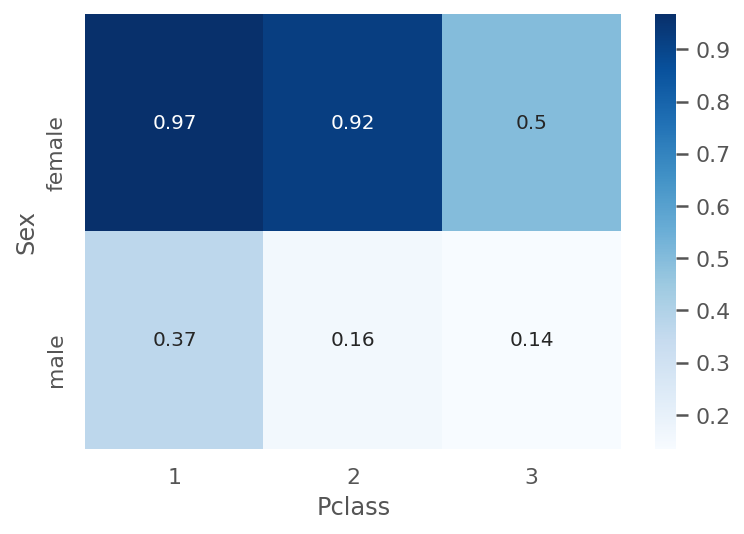

In [220]:
sns.heatmap(train_pivot, cmap='Blues', annot=True)

In [222]:
train_group = train.groupby(['Sex','Pclass'])['Survived'].mean()
train_group

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64

In [223]:
train_group = train_group.unstack()
train_group

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


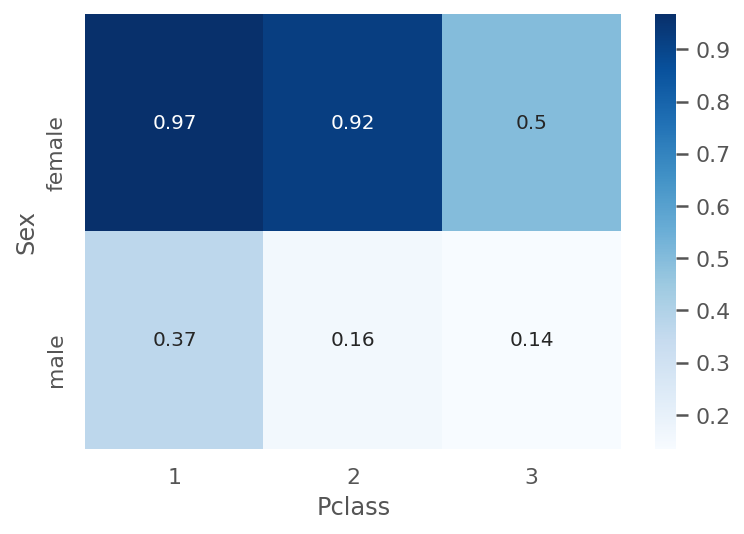

In [224]:
sns.heatmap(train_group, cmap='Blues', annot=True)

##### 승선항구, 등급별 생존율 

In [ ]:
train_group = pd.pivot_table(train, index='Embarked', columns='Pclass',  values='Survived', aggfunc = 'mean')
train_group

In [ ]:
sns.heatmap(train_group, cmap='Blues', annot=True)

In [ ]:
train_group = pd.pivot_table(train, index='Sex', columns='Embarked',  values='Survived', aggfunc = 'mean')
train_group

In [ ]:
sns.heatmap(train_group, cmap='Blues', annot=True)

##### 성별 , 승선항구, 등급별 생존율
+ catplot : 색상(hue)과 행(row) 등을 동시에 사용하여 3 개 이상의 카테고리 값에 의한 분포 변화

In [225]:
train.groupby(['Sex','Pclass','Embarked'])['Survived'].mean()

Sex     Pclass  Embarked
female  1       C           0.976744
                Q           1.000000
                S           0.958333
        2       C           1.000000
                Q           1.000000
                S           0.910448
        3       C           0.652174
                Q           0.727273
                S           0.375000
male    1       C           0.404762
                Q           0.000000
                S           0.354430
        2       C           0.200000
                Q           0.000000
                S           0.154639
        3       C           0.232558
                Q           0.076923
                S           0.128302
Name: Survived, dtype: float64

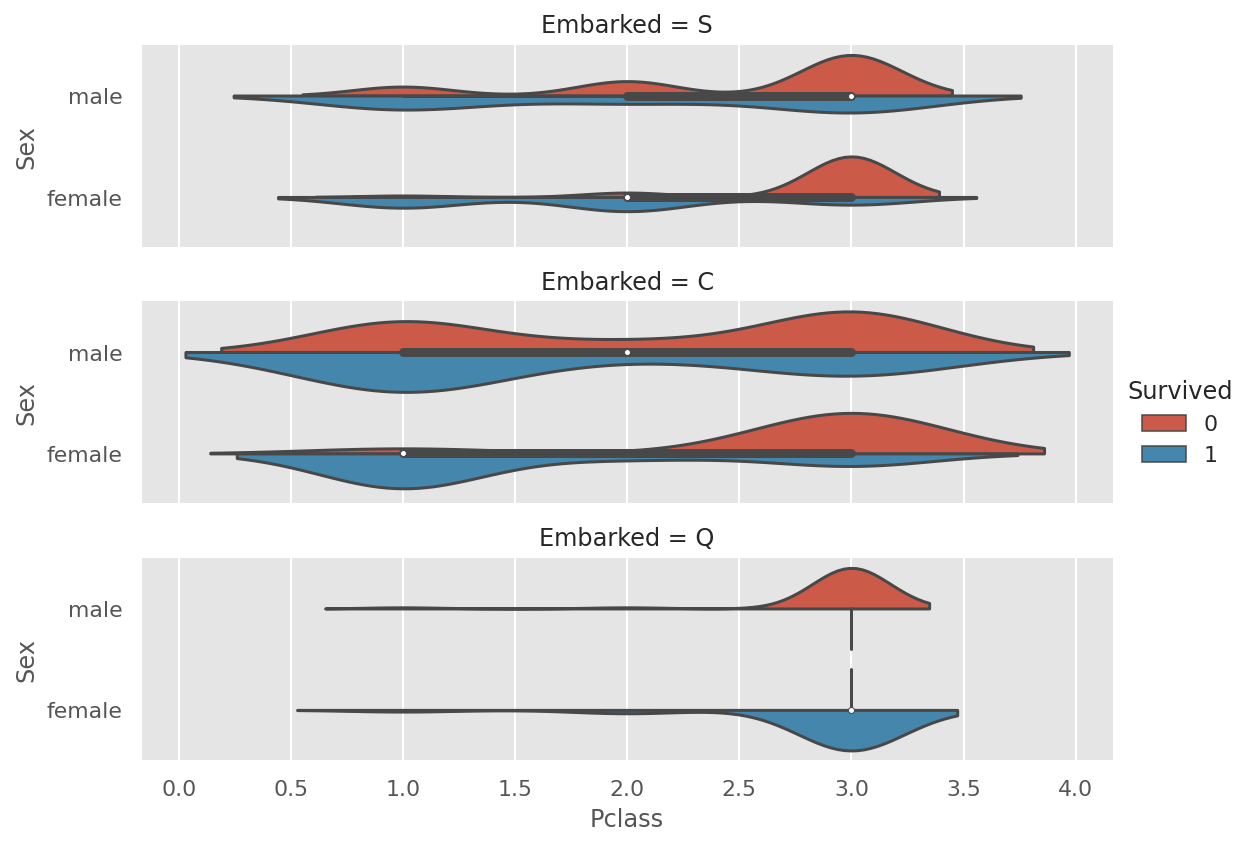

In [226]:
sns.catplot(x="Pclass", y="Sex", hue="Survived", row="Embarked", data=train,
            kind="violin", split=True, height=2, aspect=4)

#### 상관관계(correlation)


In [227]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Age_group,Cabin_first,First_Name,First_Name_label
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,None,S,2,"(19.0, 22.0]",N,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,"(36.0, 41.0]",C,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,None,S,1,"(25.0, 28.0]",N,Miss,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,"(31.8, 36.0]",C,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,None,S,1,"(31.8, 36.0]",N,Mr,0


In [228]:
train1 = train[['Survived', 'Pclass', 'Sex','Age', 'Family', 'First_Name_label']]

In [230]:
train1['Sex1'] = train1['Sex'].map({'male':1, 'female':2})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [231]:
train1.head()

,Survived,Pclass,Sex,Age,Family,First_Name_label,Sex1
0,0,3,male,22.0,2,0,1
1,1,1,female,38.0,2,1,2
2,1,3,female,26.0,1,2,2
3,1,1,female,35.0,2,1,2
4,0,3,male,35.0,1,0,1


In [ ]:
plt.figure(figsize = (8,8))
sns.heatmap(train1.corr(), cmap = "Blues", annot = True)